# Is there more crime in one borough more than the others?
## What type of crimes do people get arrested for the most?
## Which age group gets arrested the most?
## Which month gets the most arrests?
I chose this dataset because I was really interested in the show, Brooklyn 99 and I always wonder if the city I lived in was dangerous as everyone said it is. In this project, I analyzed which borough has the most arrest, which age group gets arrested the most, and which month is the most dangerous. Instead of downloading the whole dataset, I filter the dataset on the website to only arrest in 2023 so, it is more managerable. 
Dataset: https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u/about_data

In [8]:
import pandas as pd
crimes = pd.read_csv("NYPD_Arrests_Data__Historic__20240503.csv")
crimes.fillna("Unknown")
#filtering out any unrelated to research questions
crimes = crimes.filter(items = ["ARREST_DATE","PD_DESC", "OFNS_DESC", "LAW_CAT_CD", "ARREST_BORO", "JURISDICTION_CODE", "AGE_GROUP", "PERP_RACE"])
crimes

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,JURISDICTION_CODE,AGE_GROUP,PERP_RACE
0,12/31/2023,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,K,0,45-64,ASIAN / PACIFIC ISLANDER
1,12/31/2023,RECKLESS ENDANGERMENT 1,MISCELLANEOUS PENAL LAW,F,Q,0,25-44,WHITE HISPANIC
2,12/31/2023,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,B,0,25-44,BLACK HISPANIC
3,12/31/2023,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,K,0,25-44,AMERICAN INDIAN/ALASKAN NATIVE
4,12/31/2023,CRIMINAL MIS 2 & 3,CRIMINAL MISCHIEF & RELATED OF,F,Q,0,25-44,ASIAN / PACIFIC ISLANDER
...,...,...,...,...,...,...,...,...
226436,01/02/2023,"MENACING,UNCLASSIFIED",ASSAULT 3 & RELATED OFFENSES,M,B,14,18-24,BLACK
226437,01/02/2023,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,Q,0,18-24,BLACK HISPANIC
226438,01/02/2023,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,B,0,25-44,BLACK
226439,01/02/2023,"CONTEMPT,CRIMINAL",OFFENSES AGAINST PUBLIC ADMINI,M,B,0,25-44,BLACK


{'S': 10003, 'Q': 48214, 'M': 52801, 'B': 53157, 'K': 62266}


Text(0, 0.5, 'Frequency')

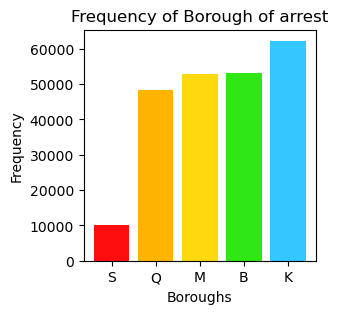

In [9]:
import matplotlib.pyplot as plt
boroughs= ["S","Q","M","B","K"] #B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
frequency = {borough:0 for borough in boroughs}
for item in crimes['ARREST_BORO']:
    for borough in boroughs:
        frequency[borough] += item.count(borough)
#using loops to count values
print(frequency)
nycboroughs = list(frequency.keys())
counts = list(frequency.values())
plt.figure(figsize=(3,3))

plt.bar(nycboroughs, counts, color=("#FF0E0E","#FFB400","#FFD90E", "#2EE715", "#34C7FF"))
plt.title('Frequency of Borough of arrest')
plt.xlabel('Boroughs')
plt.ylabel('Frequency')

([<matplotlib.patches.Wedge at 0x23cde030c50>,
 [Text(1.0894241404003977, 0.1521678097130098, 'S'),
  Text(0.6430065588427665, 0.8924923334601728, 'Q'),
  Text(-0.7713620330077495, 0.7842197485616844, 'M'),
  Text(-0.8578320474941918, -0.6885667565980242, 'B'),
  Text(0.7144539790757154, -0.8363943518358296, 'K')],
 [Text(0.5942313493093078, 0.08300062347982352, '4.4%'),
  Text(0.3507308502778726, 0.48681400006918507, '21.3%'),
  Text(-0.4207429270951361, 0.4277562264881915, '23.3%'),
  Text(-0.4679083895422864, -0.3755818672352859, '23.5%'),
  Text(0.3897021704049356, -0.45621510100136153, '27.5%')])

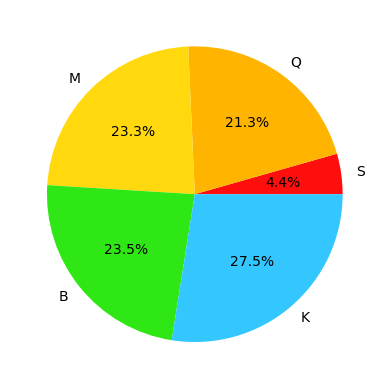

In [3]:
plt.pie(counts, labels=nycboroughs,autopct='%1.1f%%', colors=["#FF0E0E","#FFB400","#FFD90E", "#2EE715", "#34C7FF"])

  Age Groups  Amount
0      25-44   30543
1      18-24   10144
2      45-64    9605
3        <18    2184
4        65+     681


Text(0, 0.5, 'Frequency of Arrest')

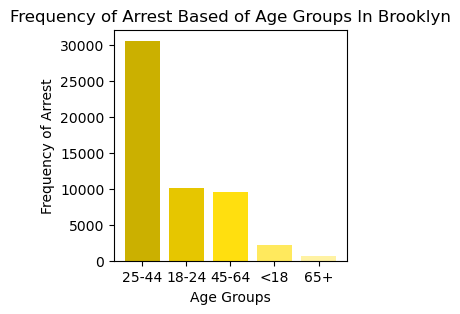

In [10]:
crimes_2 = crimes.drop(crimes[crimes["ARREST_BORO"] != "B"].index)

age_groups = crimes_2["AGE_GROUP"].value_counts()
age_groups_df1 = pd.DataFrame(age_groups.items(),columns = ["Age Groups", "Amount"])
age_groups_df1.sort_values(by="Age Groups",ascending=True)
print(age_groups_df1)
x = list(age_groups_df1["Age Groups"])
y = list(age_groups_df1["Amount"])
plt.figure(figsize=(3,3))
plt.bar(x, y, color=("#CBB000","#E6C600","#FFDF0F", "#FFE95D", "#FFF2A3"))
plt.title('Frequency of Arrest Based of Age Groups In Brooklyn')
plt.xlabel('Age Groups')
plt.ylabel('Frequency of Arrest')

Text(0, 0.5, 'Frequency of Arrest')

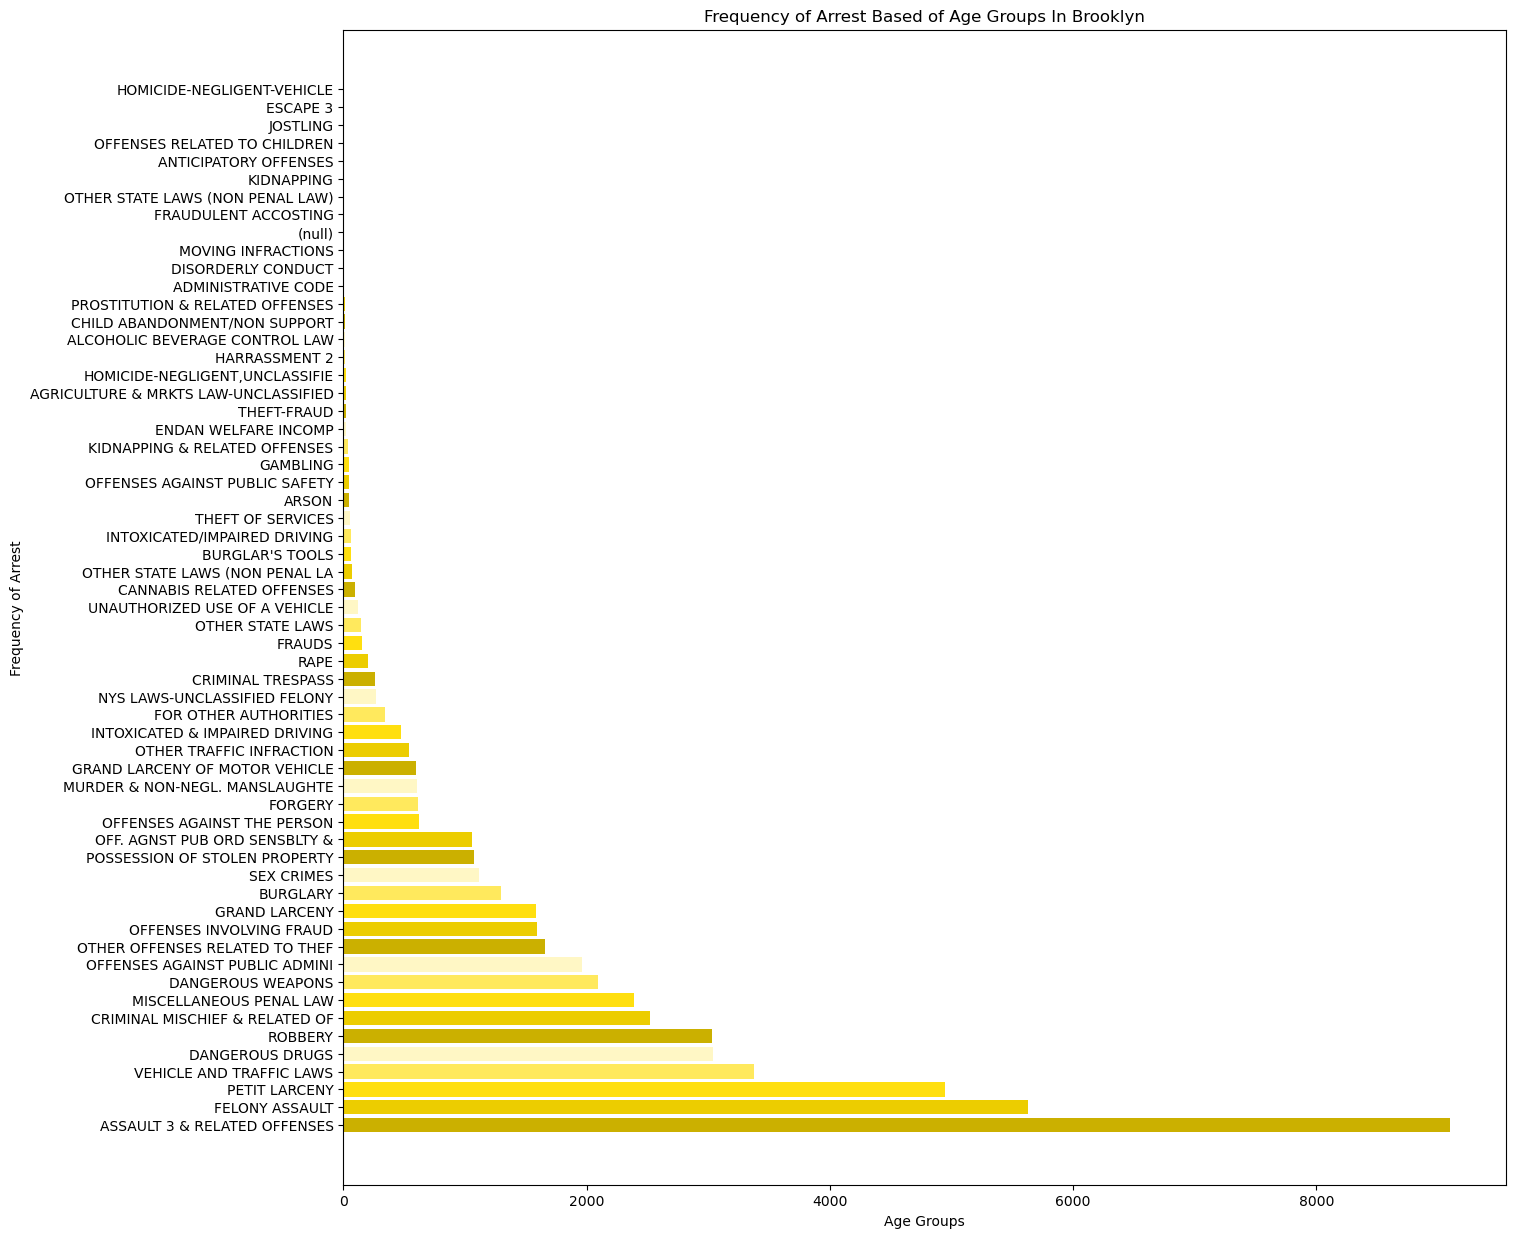

In [11]:
crimes_results = crimes_2["OFNS_DESC"].value_counts()
crimes_df1 = pd.DataFrame(crimes_results.items(),columns = ["Type of crime", "Amount"])
crimes_df1.sort_values(by="Amount",ascending=False)
y = list(crimes_df1["Type of crime"])
x = list(crimes_df1["Amount"])
plt.figure(figsize=(15,15))
plt.barh(y, x, color=("#CBB000","#ECCD00","#FFDF0F", "#FFE95D", "#FFF7C5"))
plt.title('Frequency of Arrest Based of Age Groups In Brooklyn')
plt.xlabel('Age Groups')
plt.ylabel('Frequency of Arrest')

Text(0, 0.5, 'Number of Arrest')

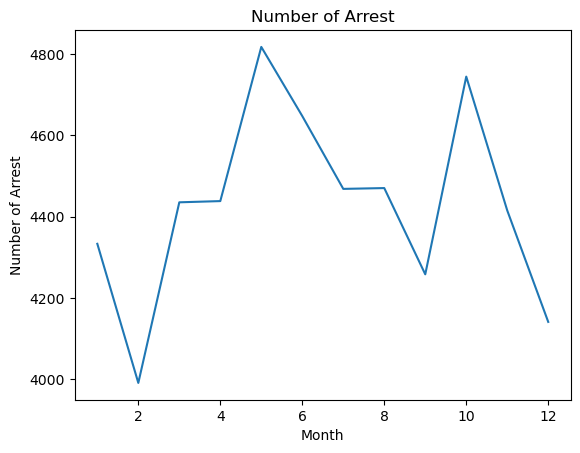

In [15]:
crimes_3 = crimes_2.filter(items =["ARREST_DATE"])
crimes_3[["Month", "Date", "Year"]] = crimes_3["ARREST_DATE"].str.split("/",expand=True)
crimes_3["Month"] = crimes_3["Month"].astype(int)
#creating a columns for the month, date and year in filtered dataset with only arrest dates. 
month_results = crimes_3["Month"].value_counts()
month_df1 = pd.DataFrame(month_results.items(),columns = ["Month", "Amount"])
month_df1= month_df1.sort_values(by="Month",ascending=True)
#making a new dataframe with just the month and frequency of each month 
month_df1
x1=list(month_df1["Month"])
y1=list(month_df1["Amount"])
plt.plot(x1, y1)
plt.title('Number of Arrest')
plt.xlabel('Month')
plt.ylabel('Number of Arrest')

Text(0, 0.5, 'Amount of Arrest')

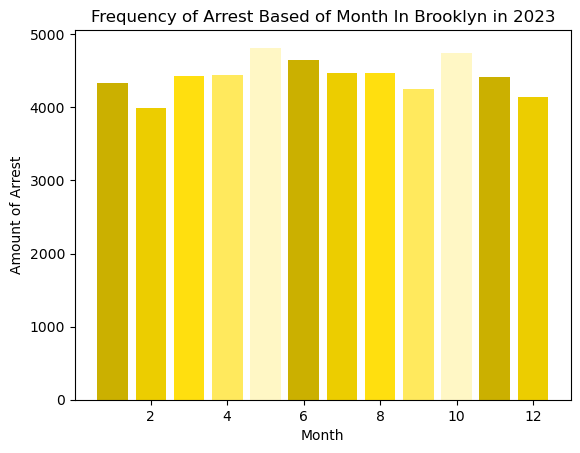

In [49]:
#making a bar graph
plt.bar(x1, y1, color=("#CBB000","#ECCD00","#FFDF0F", "#FFE95D", "#FFF7C5"))
plt.title('Frequency of Arrest Based of Month In Brooklyn in 2023')
plt.xlabel('Month')
plt.ylabel('Amount of Arrest')

# Conclusion #
The borough that has the most arrests is Brooklyn followed by Bronx and Manhattan. I was suprised that Brooklyn had the most arrests but perhaps its because it is geologically bigger. It would be interesting to see which borough had the most arrest over the last decade or crime per an area. The age group 25-44 had the most arrest and it is interesting because there is a 19 year range and similarly the 45-64 has the same range but has only ~1/3 the arrest. The month with the most arrest is May followed by October. People get arrested for assault the most with it being the first and second most frequent, followed by theft and vehicles related crimes. It's interesting to see where dangerous drug related crimes place on the graph after the legalization of weed in New York.  (Note: the month plot graph is the only one I had 2 varibles with intergers that I could use to plot x and y) 